In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary cache directory at /tmp/matplotlib-1ujpz03b because the default path (/home/erich/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv("./data.csv")
data = data.drop(8)
data = data.drop(18)

data

,Ground Truth,Channel 2,Channel 3
0,0.500,479,479
1,0.750,720,720
2,1.000,959,959
3,1.500,1440,1439
4,2.000,1921,1919
5,2.500,2401,2399
6,3.000,2882,2880
7,3.500,3361,3360
9,4.500,4321,4319
10,5.000,4800,4798


In [3]:
np.polyfit(data["Channel 2"],data["Ground Truth"], 5).tolist()

[1.6733016514476306e-19,
 -3.560323626027706e-15,
 2.8775907602045265e-11,
 -1.0362723181233393e-07,
 0.0011937605716523338,
 -0.06391402103430936]

In [4]:
import toml

# Define a dictionary with a list
config_dict = {
    "calibration": {
        "voltage_main": np.polyfit(data["Channel 2"], data["Ground Truth"], 5).tolist()[::-1],
        "voltage_amp": np.polyfit(data["Channel 3"], data["Ground Truth"], 5).tolist()[::-1],
    }
}

print(config_dict)

# Save to a TOML file
with open("config.toml", "w") as toml_file:
    toml.dump(config_dict, toml_file)

print("Data saved to config.toml")


{'calibration': {'voltage_main': [-0.06391402103430936, 0.0011937605716523338, -1.0362723181233393e-07, 2.8775907602045265e-11, -3.560323626027706e-15, 1.6733016514476306e-19], 'voltage_amp': [-0.07726974724037429, 0.0012177395834040469, -1.1296632123860654e-07, 2.9600061103378406e-11, -3.4656792405819053e-15, 1.550121167684058e-19]}}
Data saved to config.toml


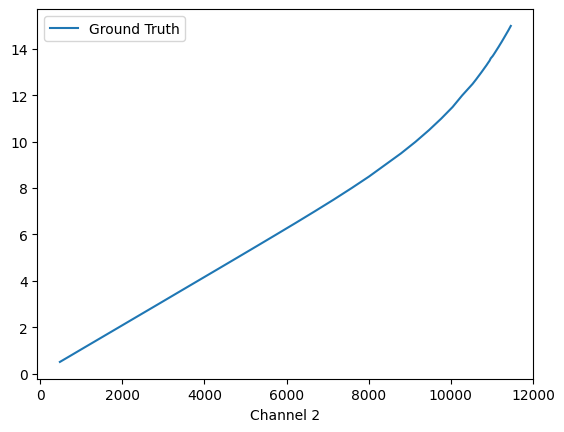

In [5]:
data.plot(x="Channel 2", y="Ground Truth")
plt.show()

In [6]:
X = data['Channel 3'].values  # Replace 'X_column_name' with the name of the column containing X values
Y = data['Ground Truth'].values  # Replace 'Y_column_name' with the name of the column containing Y values

print(np.polynomial.polynomial.Polynomial.fit(X, Y, 3))


6.19125357 + 5.5276554·(-1.08582691 + 0.00017918x) +
1.36334155·(-1.08582691 + 0.00017918x)² +
1.71658839·(-1.08582691 + 0.00017918x)³


In [7]:
min_degree = 1
max_degree = 20

# Step 3: Sweep through different degrees and perform polynomial fit
for degree in range(min_degree, max_degree + 1):
    coefficients = np.polyfit(X, Y, degree)
    Y_fit = np.polyval(coefficients, X)
    error = np.sqrt(np.mean((Y - Y_fit) ** 2))
    # - Coefficients: {coefficients},
    print(f"Degree {degree} RMSE: {error}")

Degree 1 RMSE: 0.5525458054688465
Degree 2 RMSE: 0.2713536042883444
Degree 3 RMSE: 0.11136586808540373
Degree 4 RMSE: 0.04017848965973995
Degree 5 RMSE: 0.02412867894500229
Degree 6 RMSE: 0.021620985321600297
Degree 7 RMSE: 0.02074798817989104
Degree 8 RMSE: 0.020489607539483024
Degree 9 RMSE: 0.020474269019041934
Degree 10 RMSE: 0.02009692543809899
Degree 11 RMSE: 0.01951662158902116
Degree 12 RMSE: 0.01935836989112925
Degree 13 RMSE: 0.01928202159922033
Degree 14 RMSE: 0.018643023600717443
Degree 15 RMSE: 0.01815199096193337
Degree 16 RMSE: 0.01813847743128304
Degree 17 RMSE: 0.017848171669758692
Degree 18 RMSE: 0.017707009527255065
Degree 19 RMSE: 0.017150643146440367
Degree 20 RMSE: 0.017082165841902638


/tmp/ipykernel_478815/487556903.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(X, Y, degree)
/tmp/ipykernel_478815/487556903.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(X, Y, degree)
/tmp/ipykernel_478815/487556903.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(X, Y, degree)


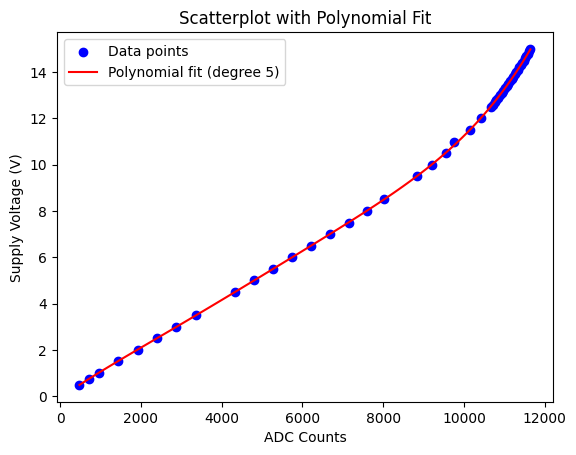

In [8]:
# Step 1: Plot the scatterplot
plt.scatter(X, Y, color='blue', label='Data points')

# Step 2: Perform a polynomial fit (e.g., degree 2 polynomial)
degree = 5
coefficients = np.polyfit(X, Y, degree)
polynomial = np.poly1d(coefficients)

# Generate X values for the polynomial line
x_line = np.linspace(X.min(), X.max(), 100)
y_line = polynomial(x_line)

# Step 3: Plot the polynomial fit line
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit (degree {degree})')

# Add labels and legend
plt.xlabel('ADC Counts')
plt.ylabel('Supply Voltage (V)')
plt.legend()
plt.title('Scatterplot with Polynomial Fit')
plt.show()

In [9]:
print(f"{coefficients}")

[ 1.55012117e-19 -3.46567924e-15  2.96000611e-11 -1.12966321e-07
  1.21773958e-03 -7.72697472e-02]


In [10]:
def evaluate_polynomial(coefficients, x):
    result = 0.0
    power_of_x = 1.0

    for coefficient in coefficients:
        result += coefficient * power_of_x
        power_of_x *= x

    return result


result = evaluate_polynomial(coefficients.tolist()[::-1], 11063)
print(result)  # Output: 17.0


13.421658523289082


In [11]:
cx = [ 1.6733016514476306e-19, -3.560323626027706e-15, 2.8775907602045265e-11, -1.0362723181233393e-7, 0.0011937605716523338, -0.06391402103430936]
evaluate_polynomial(cx[::-1], 11063)

13.820432479081102